### Week 1 Assignment: Data Exploration
##### In this week's assignment, I will be exploring a dataset provided by LA Metro that maps all bus routes in their service area.

Since we're working with spatial data, we must first import the `geopandas` geospatial library.

In [1]:
import geopandas as gpd

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Once we have imported `geopandas`, we import a shapefile provided by LA Metro.

In [2]:
# define variable metro for the dataset
brt = gpd.read_file('RapidBRT1221.zip')

In [3]:
# checking what 'type' of data
type(brt)

geopandas.geodataframe.GeoDataFrame

Let's look at some of the data!

In [4]:
# checking what the data looks like; .head shows us the first 5 rows of data
brt.head()

,VAR_ROUTE,VAR_IDENT,VAR_DIREC,VAR_DESCR,geometry
0,720,E1,2,END TO END,"LINESTRING (-118.49027 34.01384, -118.49043 34..."
1,720,E3,2,FEDERAL BLDG. L.O.,"LINESTRING (-118.44719 34.05707, -118.44699 34..."
2,720,E5,2,WILVER LO,"LINESTRING (-118.34633 34.06229, -118.34617 34..."
3,720,EB,2,WILSHIRE_BARRINGTON,"LINESTRING (-118.46105 34.04936, -118.46087 34..."
4,720,W1,3,END TO END,"LINESTRING (-118.23948 34.03875, -118.23842 34..."


In [5]:
# .sample shows us random rows of data from the dataset
brt.sample(5)

,VAR_ROUTE,VAR_IDENT,VAR_DIREC,VAR_DESCR,geometry
0,720,E1,2,END TO END,"LINESTRING (-118.49027 34.01384, -118.49043 34..."
9,754,N1,0,END TO END,"LINESTRING (-118.29150 33.92401, -118.29149 33..."
8,720,W5,3,VERMONT L.O.,"LINESTRING (-118.28949 34.06226, -118.28991 34..."
14,761,S1,1,761 RAPID END TO END,"LINESTRING (-118.45078 34.29346, -118.45078 34..."
16,854,W4,3,PATSAURAS-LITTLE TOKYO-PICO/ALISO (2020),"LINESTRING (-118.22423 34.04751, -118.22522 34..."


In [6]:
# this command gives us information about the data (i.e., number of entries or data types in the dataset)
brt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   VAR_ROUTE  23 non-null     object  
 1   VAR_IDENT  23 non-null     object  
 2   VAR_DIREC  23 non-null     int64   
 3   VAR_DESCR  23 non-null     object  
 4   geometry   23 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 1.0+ KB


In [7]:
# this following command tells us how many rows and columns exist in the dataset
brt.shape

(23, 5)

Before we start visualizing, we first have to isolate one variable from the data.

In [12]:
brt['VAR_ROUTE'].value_counts()

720    9
754    4
901    4
761    2
854    2
910    2
Name: VAR_ROUTE, dtype: int64

In [13]:
ptrn_count = brt['VAR_ROUTE'].value_counts()

In [15]:
# let's double check our new variable's data type
type(ptrn_count)

pandas.core.series.Series

In [16]:
ptrn_count = ptrn_count.reset_index()
ptrn_count

,index,VAR_ROUTE
0,720,9
1,754,4
2,901,4
3,761,2
4,854,2
5,910,2


In [17]:
type(ptrn_count)

pandas.core.frame.DataFrame

Let's rename our columns.

In [18]:
# our current column names
ptrn_count.columns.to_list()

['index', 'VAR_ROUTE']

In [19]:
ptrn_count.columns = ['Bus Route','Pattern Count']
ptrn_count

,Bus Route,Pattern Count
0,720,9
1,754,4
2,901,4
3,761,2
4,854,2
5,910,2


Now that we've cleaned up our data, let's start to visualize it.

<AxesSubplot:>

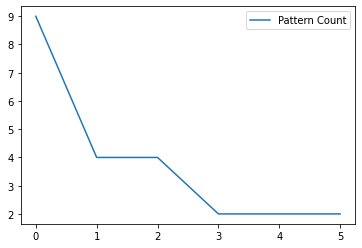

In [20]:
ptrn_count.plot()

Since we gave no instructions, this is what the computer thought we wanted. Let's be more specific.

<AxesSubplot:title={'center':'Number of patterns per BRT Route'}, xlabel='Bus Route'>

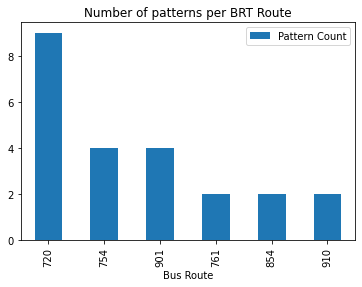

In [21]:
# assign each axis a label, and label the bar graph
ptrn_count.plot.bar(x = 'Bus Route', y = 'Pattern Count', title = 'Number of patterns per BRT Route')

Let's try mapping out our BRT routes.

In [24]:
# let's view our data's info to see what we need to map
brt.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   VAR_ROUTE  23 non-null     object  
 1   VAR_IDENT  23 non-null     object  
 2   VAR_DIREC  23 non-null     int64   
 3   VAR_DESCR  23 non-null     object  
 4   geometry   23 non-null     geometry
dtypes: geometry(1), int64(1), object(3)
memory usage: 1.0+ KB


In [27]:
# let's trim the data down to the columns we need
desired_col = ['VAR_ROUTE', 'geometry']
brt[desired_col].head()

,VAR_ROUTE,geometry
0,720,"LINESTRING (-118.49027 34.01384, -118.49043 34..."
1,720,"LINESTRING (-118.44719 34.05707, -118.44699 34..."
2,720,"LINESTRING (-118.34633 34.06229, -118.34617 34..."
3,720,"LINESTRING (-118.46105 34.04936, -118.46087 34..."
4,720,"LINESTRING (-118.23948 34.03875, -118.23842 34..."


In [28]:
brt_trimmed = brt[desired_col].copy()
brt_trimmed

,VAR_ROUTE,geometry
0,720,"LINESTRING (-118.49027 34.01384, -118.49043 34..."
1,720,"LINESTRING (-118.44719 34.05707, -118.44699 34..."
2,720,"LINESTRING (-118.34633 34.06229, -118.34617 34..."
3,720,"LINESTRING (-118.46105 34.04936, -118.46087 34..."
4,720,"LINESTRING (-118.23948 34.03875, -118.23842 34..."
5,720,"LINESTRING (-118.48877 34.02689, -118.48888 34..."
6,720,"LINESTRING (-118.40898 34.06709, -118.40948 34..."
7,720,"LINESTRING (-118.23994 34.03921, -118.23981 34..."
8,720,"LINESTRING (-118.28949 34.06226, -118.28991 34..."
9,754,"LINESTRING (-118.29150 33.92401, -118.29149 33..."


In [29]:
# the following query outputs the rows that have the 720 bus route
brt_trimmed[brt_trimmed.VAR_ROUTE == '720']

,VAR_ROUTE,geometry
0,720,"LINESTRING (-118.49027 34.01384, -118.49043 34..."
1,720,"LINESTRING (-118.44719 34.05707, -118.44699 34..."
2,720,"LINESTRING (-118.34633 34.06229, -118.34617 34..."
3,720,"LINESTRING (-118.46105 34.04936, -118.46087 34..."
4,720,"LINESTRING (-118.23948 34.03875, -118.23842 34..."
5,720,"LINESTRING (-118.48877 34.02689, -118.48888 34..."
6,720,"LINESTRING (-118.40898 34.06709, -118.40948 34..."
7,720,"LINESTRING (-118.23994 34.03921, -118.23981 34..."
8,720,"LINESTRING (-118.28949 34.06226, -118.28991 34..."


<AxesSubplot:>

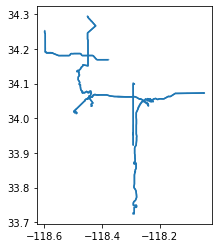

In [30]:
# this command uses the data's geometry column to plot the different BRT routes on a graph
brt_trimmed.plot()

<AxesSubplot:>

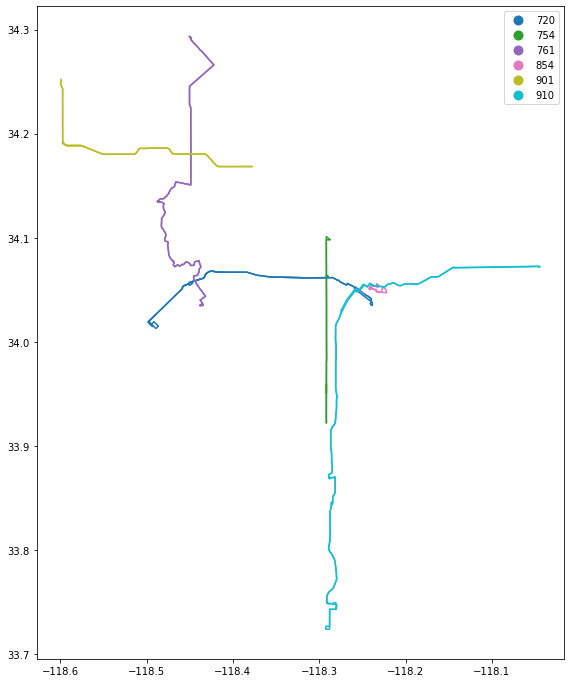

In [58]:
# let's map the map a little bigger and give each route a different color
# the code used below is sourced from Week 2's PythonandMetro lab
brt_trimmed.plot(
            figsize=(20,12),   #size of the plot
            column = 'VAR_ROUTE',   # column that defines the color of the dots
            legend = True,     # add a legend           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }                  # this puts the legend to the side
) 

End.